In [2]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

## Visualize properties of a random subset of reaction systems in a directory for comparison
- check:
    - reaction components with Database website
    - molecules with PUBCHEM/CHEBI
    - molecule properties with PUBCHEM
    - sequence with Database website
    - sequence properties with UniPROT

In [3]:
import glob
from ercollect import molecule as mol
from ercollect.molecule import molecule
from ercollect import rxn_syst
from ercollect.rxn_syst import reaction
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from IPython.display import clear_output

In [44]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

### collect a random subset of X reactions

In [51]:
no_ = 300
rs_to_test = []
no_rxns_in_total = len(glob.glob(rs_dir+"*sRS*.gpkl"))
idx = np.random.randint(no_rxns_in_total, size=no_) # + 10000

In [52]:
generator = rxn_syst.yield_rxn_syst(output_dir=rs_dir)

In [53]:
smiles_list = []
n_list = []
for i, rs in enumerate(generator):
    if i not in idx:
        continue
    if '-3_' not in rs.pkl:
        continue
    print('index:', i)
    print('pkl', rs.pkl)
    print('EC', rs.EC)
#     try:
#         print('reversible?', rs.reversible)
#     except AttributeError:
#         print('reversible?', 'unknown')
    if rs.skip_rxn is True:
        print('should be skipped?')
        try:
            print(rs.skip_reason)
        except AttributeError:
            pass
    else:
        print('----------------------------------------------')
        # check component properties
        smiles_list = []
        n_list = []
        for m in rs.components:
            print('-----------')
            print(m.name, '--', m.role)
            print('iupac:', m.iupac_name)
            if m.SMILES is not None:
                n_list.append(m.DB+' - '+m.name)
                smiles_list.append(m.SMILES)
                print('CHEBI ID:', m.chebiID)
                print('SMILES:', m.SMILES)
                print('PUBCHEM XlogP:', m.XlogP)
                print('PUBCHEM complexity:', m.complexity)
                print('RDKIT logP:', m.logP)
                print('RDKIT Synthetic accessibility:', m.Synth_score)   
                print('size:', m.mid_diam, 'angstrom')
        print('----------------------------------------------')
        print('change in complexity:', rs.delta_comp)
        print('change in synthetic accessibility:', rs.delta_sa)
        # check sequence properties
        print('----------------------------------------------')
        try:
            if rs.sequence is not None:
                print(rs.sequence)
                try:
                    print('uniprotID:', rs.UniprotID)
                except AttributeError:
                    pass
                print('add other sequence IDs for other DBs')
                print('sequence length:', len(rs.sequence))
                print('pI:', rs.pI)
                print('GRAVY:', rs.GRAVY)
                print('A index:', rs.A_index)
                print('I index:', rs.I_index)
                print('TM index:', rs.TM_index)
        except AttributeError:
            pass
    input('done?')
    clear_output()

index: 7723
pkl sRS-3_1_2_6-KEGG-R01736.gpkl
EC 3.1.2.6
----------------------------------------------
-----------
(R)-S-lactoylglutathione -- reactant
iupac: (2R)-2-amino-5-[[(2R)-1-(carboxymethylamino)-3-(2-hydroxypropanoylsulfanyl)-1-oxopropan-2-yl]amino]-5-oxopentanoic acid
CHEBI ID: 15694
SMILES: C[C@@H](O)C(=O)SC[C@H](NC(=O)CC[C@H](N)C(=O)O)C(=O)NCC(=O)O
PUBCHEM XlogP: -4.6
PUBCHEM complexity: 527
RDKIT logP: -2.495299999999996
RDKIT Synthetic accessibility: 3.61943039576684
size: 10.485 angstrom
-----------
water -- product
iupac: oxidane
CHEBI ID: 15377
SMILES: O
PUBCHEM XlogP: -0.5
PUBCHEM complexity: 0
RDKIT logP: -0.8247
RDKIT Synthetic accessibility: 5.868476923076923
size: 2.586 angstrom
-----------
glutathione -- product
iupac: 2-amino-5-[[1-(carboxymethylamino)-1-oxo-3-sulfanylpropan-2-yl]amino]-5-oxopentanoic acid
CHEBI ID: 16856
SMILES: N[C@@H](CCC(=O)N[C@@H](CS)C(=O)NCC(=O)O)C(=O)O
PUBCHEM XlogP: -4.5
PUBCHEM complexity: 389
RDKIT logP: -2.2060999999999984
RDKIT Synth

KeyboardInterrupt: 

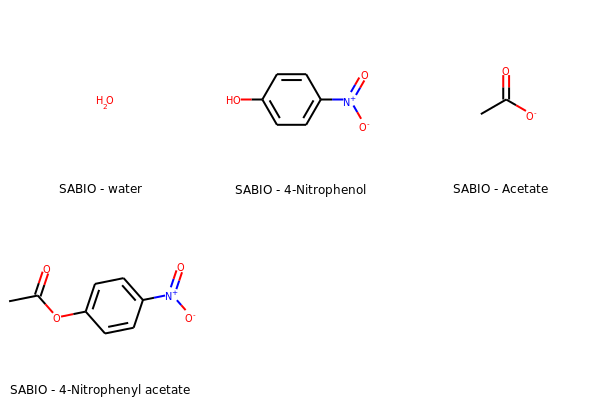

In [21]:
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)


## Visualize a specific reaction system
- includes search functions

In [34]:
from ercollect.rxn_syst import reaction, get_RS, yield_rxn_syst
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw

In [35]:
directory = '/home/atarzia/psp/screening_results/'
directory += 'new_reactions_kegg_atlas/'
# directory += 'new_reactions_sabio_wcharge/'
# directory += 'biomin_search_sabio_wcharge/'

In [11]:
# get a list of RS with max_comp_size < XX and sequence != None
XX = 6.5
for rs in yield_rxn_syst(output_dir=directory):
    if rs.skip_rxn is True:
        continue
    if rs.max_comp_size is None:
        continue
    if rs.max_comp_size < XX:
        try:
            if rs.sequence is not None:
                print(rs.pkl, rs.TM_index, rs.A_index)
        except AttributeError:
            pass

AttributeError: 'reaction' object has no attribute 'max_comp_size'

In [54]:
pkl_name = 'sRS-1_10_3_1-KEGG-R02078.gpkl'

In [55]:
rs = get_RS(directory+pkl_name, output_dir=directory, verbose=True)

loading: sRS-1_10_3_1-KEGG-R02078.gpkl


In [56]:
rs.__dict__

{'DB': 'KEGG',
 'DB_ID': 'R02078',
 'EC': '1.10.3.1',
 'UniprotID': None,
 'all_fit': False,
 'components': [<molecule.molecule at 0x7f0e9a895fd0>,
 'delta_comp': -178.0,
 'delta_sa': None,
 'max_XlogP': -1.1,
 'max_comp_size': 7.208,
 'max_logP': 0.3466,
 'min_XlogP': -3.4,
 'min_logP': -0.5772000000000004,
 'mol_collected': True,
 'p_max_comp': 176.0,
 'p_max_sa': None,
 'pkl': 'sRS-1_10_3_1-KEGG-R02078.gpkl',
 'r_max_comp': 354.0,
 'r_max_sa': None,
 'req_mod': None,
 'seed_MOF': None,
 'skip_reason': None,
 'skip_rxn': False}

L-Dopa C00355
L-Tyrosine C00082
C00007 C00007
L-dopaquinone C00822
L-Dopa C00355
water C00001


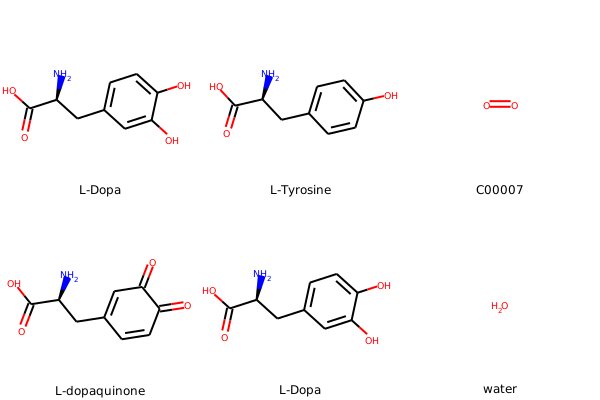

In [58]:
smiles_list = []
n_list = []
for m in rs.components:
#     print(m.name, m.mid_diam, m.logP, m.role, m.Synth_score, m.complexity, m.pkl)
    print(m.name, m.KEGG_ID)
    n_list.append(m.name)
    smiles_list.append(m.SMILES)
    MOL = Chem.MolFromSmiles(m.SMILES)
#     Draw.MolToFile(MOL, fileName=m.name+'.svg')
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)

## Analyse all RS for a certain skip_reaction reason

In [8]:
import os

In [9]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/'
# rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

In [10]:
count = 0
count_total = 0
for rs in rxn_syst.yield_rxn_syst(output_dir=rs_dir):
    count_total += 1
    if rs.skip_rxn is True:
        if rs.skip_reason == 'one component has no SMILES':
            count += 1
            print(rs.pkl)
            os.system('rm '+rs_dir+rs.pkl)

sRS-1_10_3_10-KEGG-R11335.gpkl
sRS-1_10_3_11-KEGG-R09504.gpkl
sRS-1_10_3_12-KEGG-R09492.gpkl
sRS-1_10_3_14-KEGG-R11325.gpkl
sRS-1_10_3_14-KEGG-R11885.gpkl
sRS-1_10_3_14-KEGG-R11886.gpkl
sRS-1_10_3_2-KEGG-R00083.gpkl
sRS-1_11_1_16-KEGG-R07612.gpkl
sRS-1_11_1_21-KEGG-R02596.gpkl
sRS-1_11_1_21-KEGG-R03532.gpkl
sRS-1_11_1_21-KEGG-R03919.gpkl
sRS-1_11_1_21-KEGG-R07443.gpkl
sRS-1_11_1_7-KEGG-R02596.gpkl
sRS-1_11_1_7-KEGG-R03532.gpkl
sRS-1_11_1_7-KEGG-R03919.gpkl
sRS-1_11_1_7-KEGG-R07443.gpkl
sRS-1_11_1_XX-ATLAS-rat010350.gpkl
sRS-1_11_1_XX-ATLAS-rat010390.gpkl
sRS-1_11_1_XX-ATLAS-rat010391.gpkl
sRS-1_11_1_XX-ATLAS-rat010392.gpkl
sRS-1_11_1_XX-ATLAS-rat010393.gpkl
sRS-1_11_1_XX-ATLAS-rat010585.gpkl
sRS-1_11_1_XX-ATLAS-rat010586.gpkl
sRS-1_11_1_XX-ATLAS-rat010605.gpkl
sRS-1_11_1_XX-ATLAS-rat010737.gpkl
sRS-1_11_1_XX-ATLAS-rat010738.gpkl
sRS-1_11_1_XX-ATLAS-rat010739.gpkl
sRS-1_11_1_XX-ATLAS-rat010740.gpkl
sRS-1_11_1_XX-ATLAS-rat010782.gpkl
sRS-1_11_1_XX-ATLAS-rat010804.gpkl
sRS-1_11_1_XX-ATLAS

In [11]:
print(count, count_total, count/count_total * 100)

1749 49971 3.500030017410098


## Analyse the number of times each skip_reason is used

In [29]:
reasons = {'one component failed resolution': 0, 'SABIO E-ID is for mutant': 0, 
           'SABIO R-ID not found': 0,  'DNA present - SABIO has a bug': 0,
           'CHEBI ID of a component not available': 0, 'a component is in skip_names': 0,
           'one component is ?': 0, 'No result for KEGG URL search - likely outdated': 0,
           'CHEBI ID not available for one component': 0,
           'one component has invalid SMILES': 0, 'one component has no SMILES': 0, 
           'one component has wildcard SMILES': 0,
           'one component has no molecule - rxn is incomplete or generic': 0,
           'one component could not have diameter calculated': 0}

In [30]:
# rs_dir = '/home/atarzia/psp/screening_results/new_reactions_sabio_wcharge/'
rs_dir = '/home/atarzia/psp/screening_results/new_reactions_kegg_atlas/'
# rs_dir = '/home/atarzia/psp/screening_results/biomin_search_sabio_wcharge/'

In [31]:
count_total = 0
count_skipped = 0
for rs in rxn_syst.yield_rxn_syst(output_dir=rs_dir):
    if 'KEGG' not in rs.pkl:
        continue
    count_total += 1
    if rs.skip_rxn is True:
        count_skipped += 1
        reasons[rs.skip_reason] += 1
#         if rs.skip_reason == 'CHEBI ID not available for one component':
#             print(rs.__dict__)
#             input()

In [32]:
print(count_skipped, count_total, count_skipped/count_total * 100)

8726 12182 71.6302741750123


In [33]:
reasons

{'CHEBI ID not available for one component': 3261,
 'CHEBI ID of a component not available': 0,
 'DNA present - SABIO has a bug': 0,
 'No result for KEGG URL search - likely outdated': 2,
 'SABIO E-ID is for mutant': 0,
 'SABIO R-ID not found': 0,
 'a component is in skip_names': 0,
 'one component could not have diameter calculated': 3767,
 'one component failed resolution': 0,
 'one component has invalid SMILES': 9,
 'one component has no SMILES': 583,
 'one component has no molecule - rxn is incomplete or generic': 0,
 'one component has wildcard SMILES': 1104,
 'one component is ?': 0}